In [11]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

df = pd.read_csv('trainscaled.csv')

y = df['satisfaction']
X = df.drop(columns=['satisfaction'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForest': RandomForestClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'SVC': SVC(),
    'KNN': KNeighborsClassifier()
}

In [12]:
import mlflow
import mlflow.sklearn


results = []

mlflow.set_experiment("satisfaction_classification")

for name, model in models.items():
    mlflow.end_run()
    
    with mlflow.start_run(run_name=name):  
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        results.append([name, accuracy, precision, recall, f1])

 
        mlflow.log_metrics({
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1
        })
        
        mlflow.sklearn.log_model(model, artifact_path=name)


results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print("\nResults:\n", results_df)


results_df = results_df.sort_values(by="F1 Score", ascending=False)
print("\nSorted by High Score:\n", results_df)


2025/09/16 06:50:53 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/16 06:51:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/09/16 06:51:02 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/16 06:51:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/09/16 06:51:10 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/16 06:51:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/09/16 06:51:19 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use 


Results:
                 Model  Accuracy  Precision    Recall  F1 Score
0  LogisticRegression  0.856667   0.856000  0.810606  0.832685
1        RandomForest  0.916667   0.914729  0.893939  0.904215
2    GradientBoosting  0.926667   0.933071  0.897727  0.915058
3                 SVC  0.831667   0.846809  0.753788  0.797595
4                 KNN  0.853333   0.860656  0.795455  0.826772

Sorted by High Score:
                 Model  Accuracy  Precision    Recall  F1 Score
2    GradientBoosting  0.926667   0.933071  0.897727  0.915058
1        RandomForest  0.916667   0.914729  0.893939  0.904215
0  LogisticRegression  0.856667   0.856000  0.810606  0.832685
4                 KNN  0.853333   0.860656  0.795455  0.826772
3                 SVC  0.831667   0.846809  0.753788  0.797595


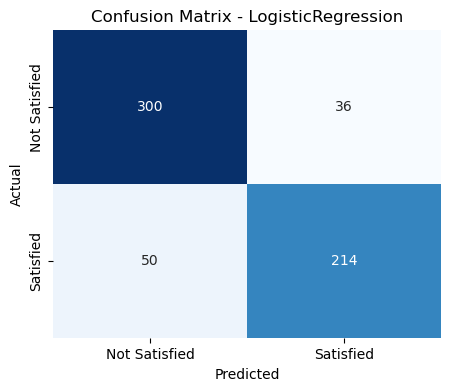

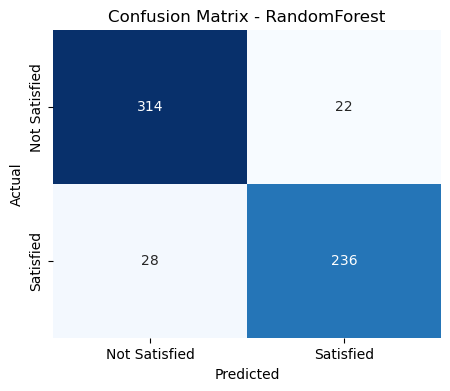

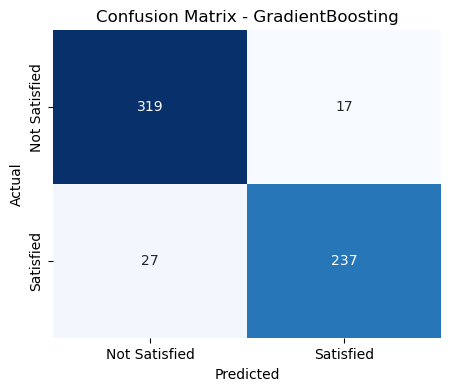

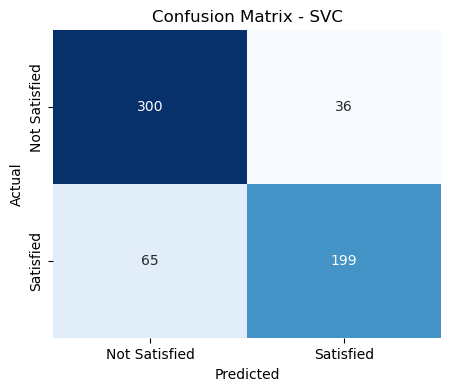

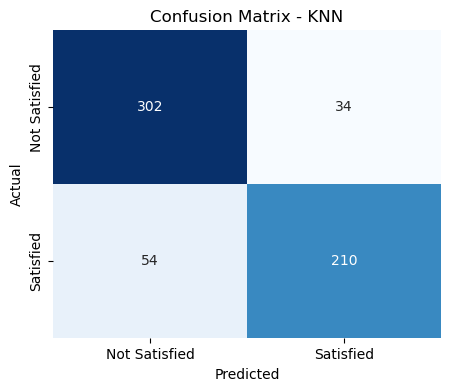

: 

: 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not Satisfied','Satisfied'],
                yticklabels=['Not Satisfied','Satisfied'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()